In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 10s 2us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

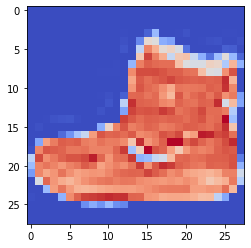

In [7]:
plt.imshow(X_train[0],cmap='coolwarm')

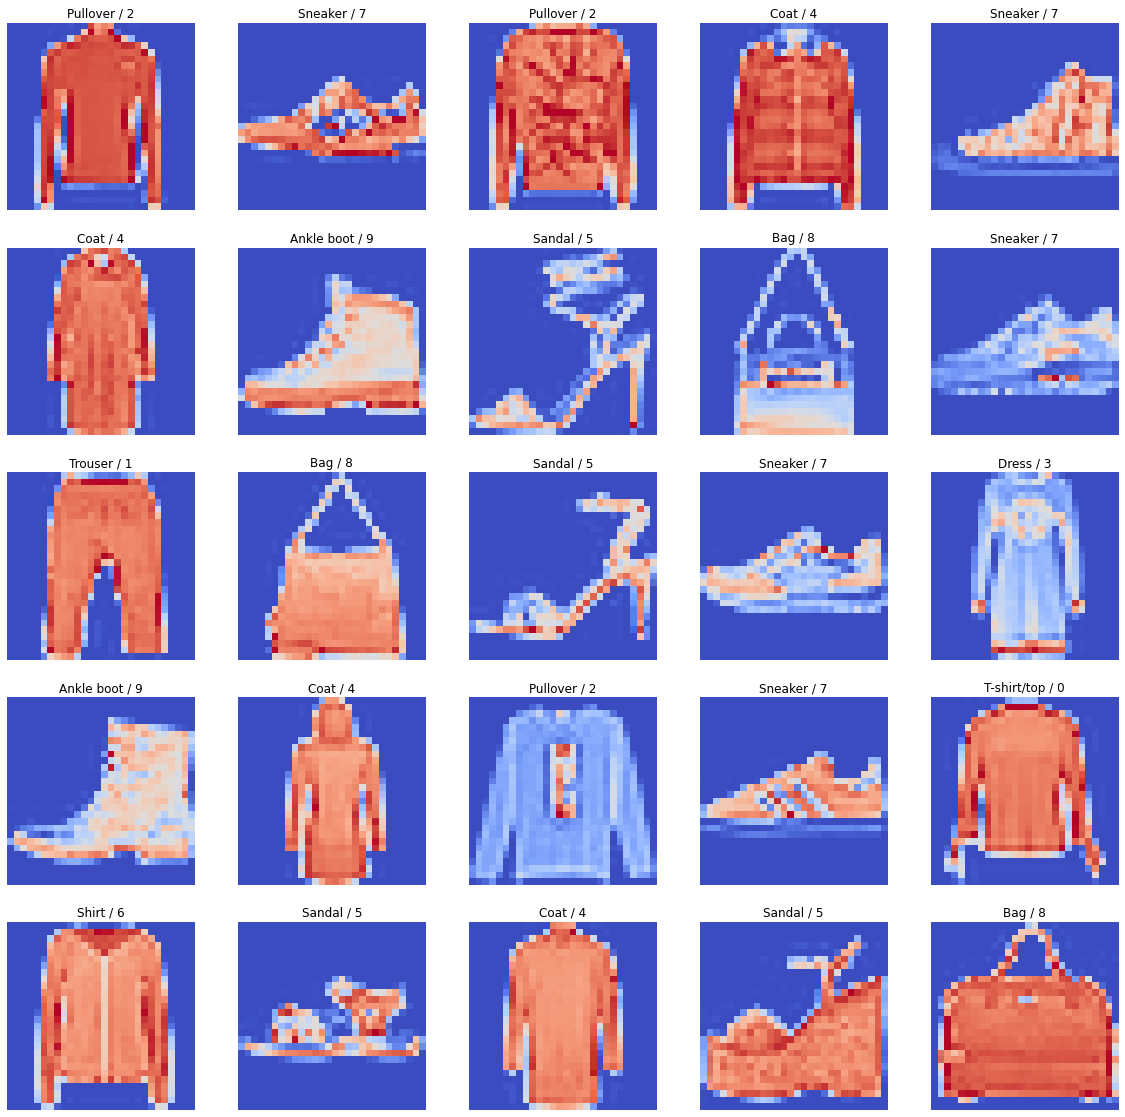

In [10]:
plt.figure(figsize=(20,20))
j=1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5,5,j)
    j+=1
    plt.imshow(X_train[i], cmap="coolwarm")
    plt.axis('off') # off the axis
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train.ndim


3

In [13]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


In [14]:
X_train.ndim

4

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=20)

In [18]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [19]:
cnn_model = keras.models.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=128, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(units=256, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(units=128, activation='relu'),
tf.keras.layers.Dense(units=10, activation='softmax')
])

In [20]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
#Train the Model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
3000/3000 [==============================] - 39s 12ms/step - loss: 0.5550 - accuracy: 0.7960 - val_loss: 0.3584 - val_accuracy: 0.8633
Epoch 2/20
3000/3000 [==============================] - 37s 12ms/step - loss: 0.3671 - accuracy: 0.8666 - val_loss: 0.3233 - val_accuracy: 0.8754
Epoch 3/20
3000/3000 [==============================] - 38s 12ms/step - loss: 0.3205 - accuracy: 0.8836 - val_loss: 0.3089 - val_accuracy: 0.8807
Epoch 4/20
3000/3000 [==============================] - 38s 13ms/step - loss: 0.2895 - accuracy: 0.8942 - val_loss: 0.2936 - val_accuracy: 0.8935
Epoch 5/20
3000/3000 [==============================] - 37s 12ms/step - loss: 0.2698 - accuracy: 0.9019 - val_loss: 0.2632 - val_accuracy: 0.9003
Epoch 6/20
3000/3000 [==============================] - 36s 12ms/step - loss: 0.2543 - accuracy: 0.9065 - val_loss: 0.2612 - val_accuracy: 0.9041
Epoch 7/20
3000/3000 [==============================] - 36s 12ms/step - loss: 0.2419 - accuracy: 0.9123 - val_loss: 0.2755 -

In [22]:
y_pred = cnn_model.predict(X_test)

cnn_model.evaluate(X_test, y_test)


313/313 [==============================] - 3s 7ms/step - loss: 0.3163 - accuracy: 0.9028


[0.31626763939857483, 0.9028000235557556]

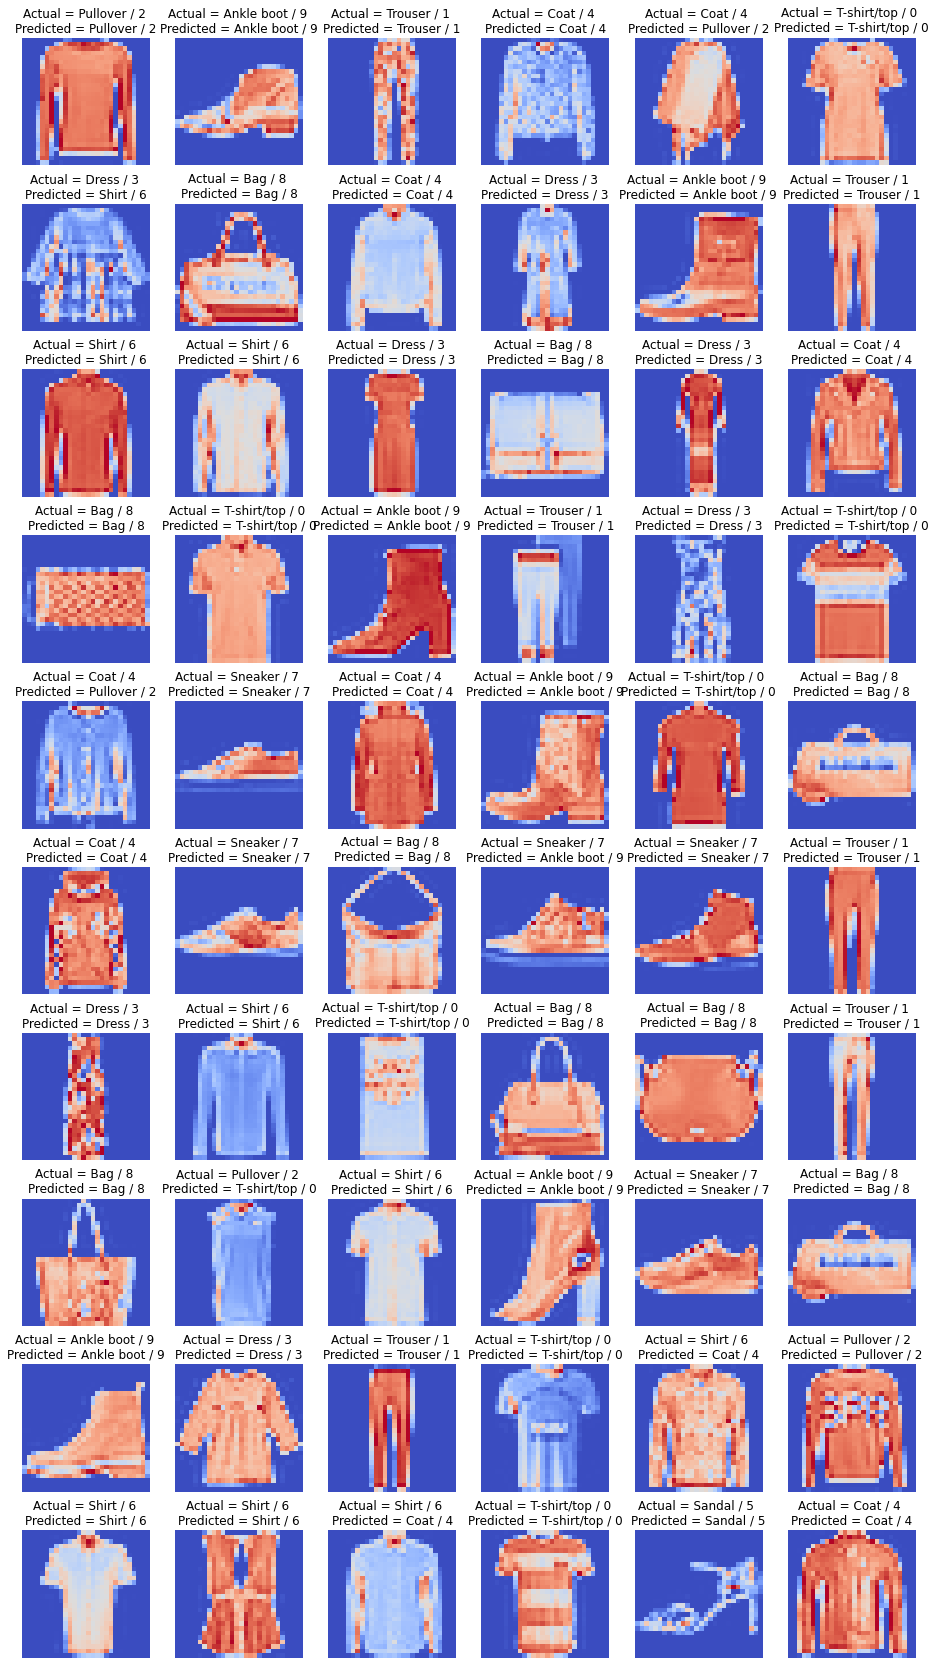

In [23]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j)
    j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap = 'coolwarm')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')



<AxesSubplot: >

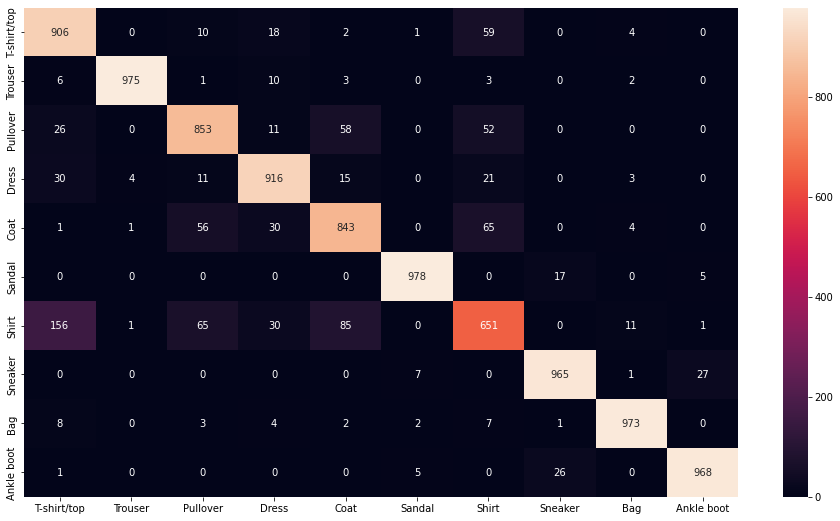

In [24]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [25]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.91      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.85      0.85      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.84      0.84      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.65      0.70      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

